### Loading the data

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\aiswa\OneDrive\Desktop\VIT\SecondSemester\DataMining\IBM_attritiondata.csv')
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### Exploratory Data Analysis

In [2]:
data.shape

(1470, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [5]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### About the Dataset:
* The dataset contains details on the factors which might contribute towards Attrition in IBM, an American MNC.
* The task is `Binary Classification`
* The dataset url is: https://www.kaggle.com/datasets/yasserh/ibm-attrition-dataset
* The dataset has 1470 records and 13 columns
* There are no missing values
* Target column is: `Attrition` which is the employee attrition status which has two unique values - No, Yes
* There seems to be a class imbalance in the target column - 'No' value is more in count than 'Yes'
* The predictors include: Age of employee, Department of work, their Distance from Home, Education level, Education Field, Environment Satisfaction, Job Satisfaction, Marital Status, Monthly Income, Number of Companies worked prior to IBM, Work Life Balance, Years at Company - current years of service in IBM.
* The various levels in Education and their meanings are: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor
* For Environment Satisfaction column: 1-Low; 2-Medium; 3-High; 4-Very High
* For Job Satisfaction column: 1-Low; 2-Medium; 3-High; 4-Very High 
* For Work Life Balance column: 1-Bad; 2-Good; 3-Better; 4-Best

In [6]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

##### Replacing 'Yes' and 'No' in `Attrition` column as '1' and '0' respectively

In [7]:
data.replace({'Attrition':{'Yes':1, 'No':0}}, inplace = True)

In [8]:
data.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [9]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [10]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [12]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

#### Separating columns into categorical, numerical and ordinal

In [13]:
categorical_cols = ['Department', 'EducationField', 'MaritalStatus']
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

##### Performing `One-Hot Encoding` since there is no natural order among the departments

In [14]:
data = pd.get_dummies(data, columns=['Department', 'EducationField', 'MaritalStatus'],
                      drop_first=True) # to avoid the dummy variable trap

In [15]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,5993,8,1,6,0,1,1,0,0,0,0,0,1
1,49,0,8,1,3,2,5130,1,3,10,1,0,1,0,0,0,0,1,0
2,37,1,2,2,4,3,2090,6,3,0,1,0,0,0,0,1,0,0,1
3,33,0,3,4,4,3,2909,1,3,8,1,0,1,0,0,0,0,1,0
4,27,0,2,1,1,2,3468,9,3,2,1,0,0,0,1,0,0,1,0


In [16]:
data.shape

(1470, 19)

#### Separating the Predictors and the Target

In [17]:
X = data.drop('Attrition', axis = 1)
X.shape

(1470, 18)

In [18]:
y = data['Attrition']
y.shape

(1470,)

Note:
* Splitting the data and then scaling the features because if we scale the entire dataset before splitting, then the min and max values will be calculated using all the data, including the test set => which might give the model extra information on the test set.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, 
                                                    random_state = 42)

* `stratify = y` -> preserves the class distribution in both the train and test sets, i.e., both X_train and X_test will have the same ratio of 1 and 0 as the original dataset.

##### Scaling the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = numerical_cols
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

### Baseline Models

### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(class_weight = 'balanced')
log_r.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [22]:
y_pred_log_r = log_r.predict(X_test)
y_pred_log_r[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
accuracy_logr = accuracy_score(y_test, y_pred_log_r)
precision_logr = precision_score(y_test, y_pred_log_r)
recall_logr = recall_score(y_test, y_pred_log_r)
f1_logr = f1_score(y_test, y_pred_log_r)
confusion_mat_logr = confusion_matrix(y_test, y_pred_log_r)

print("Accuracy: ", accuracy_logr)
print("Precision: ", precision_logr )
print("Recall: ", recall_logr)
print("F1 Score: ", f1_logr)
print("Confusion Matrix: \n", confusion_mat_logr)
print("Classification Report: \n", classification_report(y_test, y_pred_log_r))

y_proba_logr = log_r.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_logr)
auc_logr = auc(fpr, tpr)
print("AUC Score: ", auc_logr)

Accuracy:  0.6836734693877551
Precision:  0.2653061224489796
Recall:  0.5531914893617021
F1 Score:  0.35862068965517246
Confusion Matrix: 
 [[175  72]
 [ 21  26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       247
           1       0.27      0.55      0.36        47

    accuracy                           0.68       294
   macro avg       0.58      0.63      0.57       294
weighted avg       0.79      0.68      0.72       294

AUC Score:  0.6820570247221983


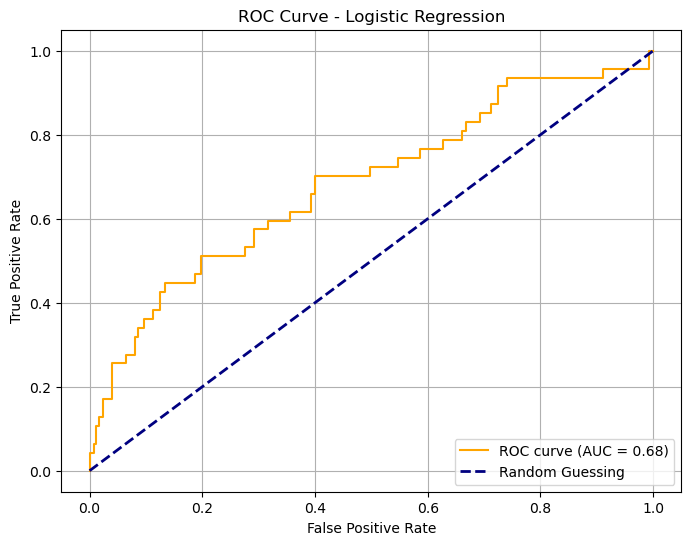

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {auc_logr:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Logistic Regression Inferences
* Accuracy - 68.4% which seems to be decent
* Precision, Recall, F1 Score seems to be better for class 0, i.e., No Attrition, which is the majority class.
* Recall for class 1 = 0.55, i.e., the model will catch around 55% of actual resignations.
* Precision for class 1 = 0.27, i.e., the model could raise many false alarms.
* AUC score = 0.68, i.e., the model has moderate discriminative ability between Yes and No attrition cases.

#### Trying with PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
logr_pca = LogisticRegression(class_weight = 'balanced')
logr_pca.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [27]:
y_pred_logr_pca = logr_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred_logr_pca))

y_proba_logr_pca = logr_pca.predict_proba(X_test_pca)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_logr_pca)
auc_logr_pca = auc(fpr, tpr)
print("AUC Score:", auc_logr_pca)

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       247
           1       0.20      0.55      0.29        47

    accuracy                           0.57       294
   macro avg       0.53      0.56      0.49       294
weighted avg       0.76      0.57      0.63       294

AUC Score: 0.5666293393057111


* Thus, AUC Score has decreased, i.e., maybe reducing to 2 components has lead to the loss of lot of information.
* Thus, could try PCA with more components, if needed

### 2. Softmax Regression

In [28]:
sof_r = LogisticRegression(multi_class = 'multinomial', class_weight = 'balanced')
sof_r.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [29]:
y_pred_sofr = sof_r.predict(X_test)
y_pred_sofr[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [30]:
accuracy_sofr = accuracy_score(y_test, y_pred_sofr)
precision_sofr = precision_score(y_test, y_pred_sofr)
recall_sofr = recall_score(y_test, y_pred_sofr)
f1_sofr = f1_score(y_test, y_pred_sofr)
confusion_mat_sofr = confusion_matrix(y_test, y_pred_sofr)

print("Accuracy: ", accuracy_sofr)
print("Precision: ", precision_sofr )
print("Recall: ", recall_sofr)
print("F1 Score: ", f1_sofr)
print("Confusion Matrix: \n", confusion_mat_sofr)
print("Classification Report: \n", classification_report(y_test, y_pred_sofr))

y_proba_sofr = sof_r.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_sofr)
auc_sofr = auc(fpr, tpr)
print("AUC Score: ", auc_sofr)

Accuracy:  0.6768707482993197
Precision:  0.26
Recall:  0.5531914893617021
F1 Score:  0.35374149659863946
Confusion Matrix: 
 [[173  74]
 [ 21  26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       247
           1       0.26      0.55      0.35        47

    accuracy                           0.68       294
   macro avg       0.58      0.63      0.57       294
weighted avg       0.79      0.68      0.72       294

AUC Score:  0.6808510638297872


#### Model Evaluation - Softmax Regression
* Accuracy = 67.6% - slightly lower than the logistic regression model
* Class 1 Precision = 0.26, i.e., out of all the predictions made for class 1, only 26% were correct. (more FPs)
* Class 1 Recall = 0.55, i.e., the model cateches 55% of actual attrition cases. 
* F1 score = 0.35, i.e., reflects the imbalance
* AUC Score = 0.681, indicates that the model has some discriminator power (> 0.5)
* Model still favors the majority class (because of the class imbalance)

### 3. SVM (kernel = Linear)

In [31]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', class_weight = 'balanced')
svm_linear.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [32]:
y_pred_svml = svm_linear.predict(X_test)
y_pred_svml[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [33]:
accuracy_svml = accuracy_score(y_test, y_pred_svml)
precision_svml = precision_score(y_test, y_pred_svml)
recall_svml = recall_score(y_test, y_pred_svml)
f1_svml = f1_score(y_test, y_pred_svml)
confusion_mat_svml = confusion_matrix(y_test, y_pred_svml)

print("Accuracy: ", accuracy_svml)
print("Precision: ", precision_svml )
print("Recall: ", recall_svml)
print("F1 Score: ", f1_svml)
print("Confusion Matrix: \n", confusion_mat_svml)
print("Classification Report: \n", classification_report(y_test, y_pred_svml))


y_scores = svm_linear.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
auc_svm_linear = auc(fpr, tpr)

print("AUC Score:", auc_svm_linear)

Accuracy:  0.6700680272108843
Precision:  0.2549019607843137
Recall:  0.5531914893617021
F1 Score:  0.348993288590604
Confusion Matrix: 
 [[171  76]
 [ 21  26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       247
           1       0.25      0.55      0.35        47

    accuracy                           0.67       294
   macro avg       0.57      0.62      0.56       294
weighted avg       0.79      0.67      0.71       294

AUC Score: 0.674821259367732


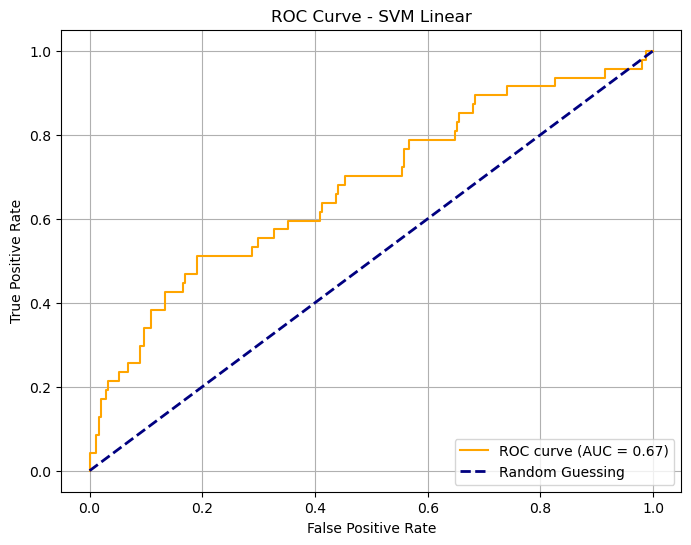

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {auc_svm_linear:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Linear")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Plotting the decision boundary after PCA for SVM (kernel = Linear)

In [35]:
svm_linear = SVC(kernel = 'linear', class_weight = 'balanced')
svm_linear.fit(X_train_pca, y_train)

SVC(class_weight='balanced', kernel='linear')

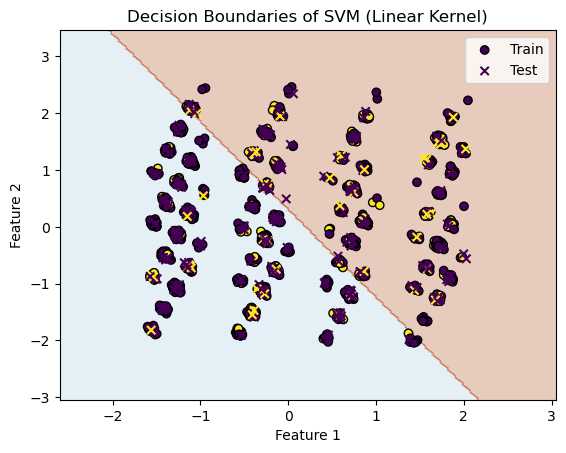

In [36]:
import numpy as np
 # Preparing the mesh_grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() -1, X_train_pca[:, 1].max() + 1
 # points in the space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
 ## Class prediction
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
 ## Reshaping Z back, so that we can plot like (X1, X2, Z)
Z = Z.reshape(xx.shape)
 # plotting the contour - the color is determined by Z
plt.contourf(xx,yy,Z,alpha = 0.3, cmap = plt.cm.Paired)
 # Scatter plot for the train data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, edgecolors = 'k', label = 'Train')
 # Scatter plot for the test data
plt.scatter(X_test_pca[:,0], X_test_pca[:, 1], c = y_test, marker = 'x', label = 'Test') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of SVM (Linear Kernel)')
plt.legend()
plt.show()

### 4. SVM (kernel = poly)

In [37]:
svmpoly = SVC(kernel = 'poly', degree = 2, coef0 = 1, class_weight = 'balanced')
svmpoly.fit(X_train, y_train)

SVC(class_weight='balanced', coef0=1, degree=2, kernel='poly')

In [38]:
y_pred_svmp = svmpoly.predict(X_test)
y_pred_svmp[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [39]:
accuracy_svmp = accuracy_score(y_test, y_pred_svmp)
precision_svmp = precision_score(y_test, y_pred_svmp)
recall_svmp = recall_score(y_test, y_pred_svmp)
f1_svmp = f1_score(y_test, y_pred_svmp)
confusion_mat_svmp = confusion_matrix(y_test, y_pred_svmp)

print("Accuracy: ", accuracy_svmp)
print("Precision: ", precision_svmp )
print("Recall: ", recall_svmp)
print("F1 Score: ", f1_svmp)
print("Confusion Matrix: \n", confusion_mat_svmp)
print("Classification Report: \n", classification_report(y_test, y_pred_svmp))


y_scores = svmpoly.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
auc_svm_poly = auc(fpr, tpr)

print("AUC Score:", auc_svm_linear)

Accuracy:  0.6836734693877551
Precision:  0.27450980392156865
Recall:  0.5957446808510638
F1 Score:  0.37583892617449666
Confusion Matrix: 
 [[173  74]
 [ 19  28]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       247
           1       0.27      0.60      0.38        47

    accuracy                           0.68       294
   macro avg       0.59      0.65      0.58       294
weighted avg       0.80      0.68      0.72       294

AUC Score: 0.674821259367732


* 

#### Hyperparameter Tuning using GridSearch CV

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 'degree': [1, 2,3],
 'coef0' : [2,3,5,7],
 'C' : [0.01, 0.1, 1, 10, 100, 1000]
}

In [41]:
svmp_new = SVC(random_state = 0, kernel = 'poly', class_weight = 'balanced')
grid_search = GridSearchCV(estimator = svmp_new, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='poly',
                           random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'coef0': [2, 3, 5, 7], 'degree': [1, 2, 3]},
             scoring='roc_auc')

* Using Roc_auc as the scoring metric and not accuracy, because of the class imbalance

In [42]:
best_model_poly = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred_tuned = best_model_poly.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)


y_scores = best_model_poly.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
auc_svm_polybest = auc(fpr, tpr)

print("Accuracy of the tuned model: ", accuracy_tuned)
print("ROC AUC Score of the tuned model: ", auc_svm_polybest)
print("Best parameters: ", best_params)
print("Best Cross Validation Score: ", grid_search.best_score_)
print("Classification report of tuned model: ", classification_report(y_test, y_pred_tuned))

Accuracy of the tuned model:  0.6564625850340136
ROC AUC Score of the tuned model:  0.6754242398139375
Best parameters:  {'C': 1000, 'coef0': 2, 'degree': 1}
Best Cross Validation Score:  0.7430559940845807
Classification report of tuned model:                precision    recall  f1-score   support

           0       0.89      0.68      0.77       247
           1       0.25      0.55      0.34        47

    accuracy                           0.66       294
   macro avg       0.57      0.61      0.55       294
weighted avg       0.79      0.66      0.70       294



* Shows a similar accuracy and other metrics to that of the linear kernel SVM

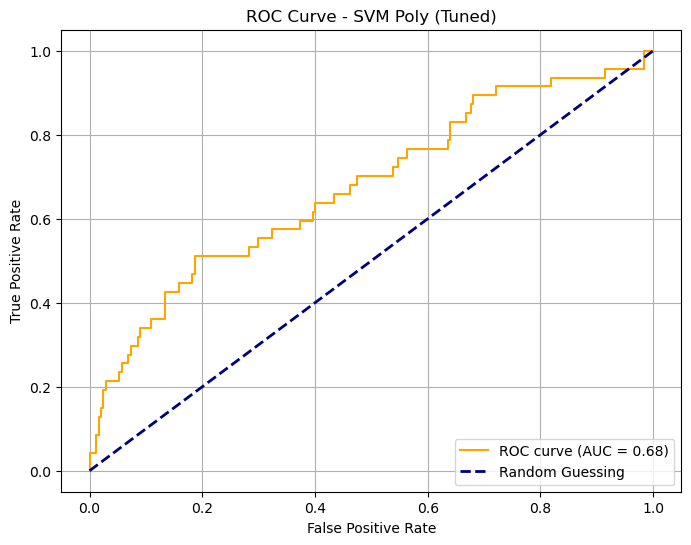

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {auc_svm_polybest:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Poly (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 5. SVM (kernel = 'rbf')

In [44]:
svmrbf = SVC(kernel = 'rbf', gamma = 20, class_weight = 'balanced')
svmrbf.fit(X_train, y_train)

SVC(class_weight='balanced', gamma=20)

In [45]:
y_pred_svmr = svmrbf.predict(X_test)
y_pred_svmr[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
accuracy_svmr = accuracy_score(y_test, y_pred_svmr)
precision_svmr = precision_score(y_test, y_pred_svmr)
recall_svmr = recall_score(y_test, y_pred_svmr)
f1_svmr = f1_score(y_test, y_pred_svmr)
confusion_mat_svmr = confusion_matrix(y_test, y_pred_svmr)

print("Accuracy: ", accuracy_svmr)
print("Precision: ", precision_svmr )
print("Recall: ", recall_svmr)
print("F1 Score: ", f1_svmr)
print("Confusion Matrix: \n", confusion_mat_svmr)
print("Classification Report: \n", classification_report(y_test, y_pred_svmr))


y_scores = svmrbf.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
auc_svm_rbf = auc(fpr, tpr)

print("AUC Score:", auc_svm_rbf)

Accuracy:  0.8435374149659864
Precision:  0.6666666666666666
Recall:  0.0425531914893617
F1 Score:  0.08
Confusion Matrix: 
 [[246   1]
 [ 45   2]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.91       247
           1       0.67      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.76      0.52      0.50       294
weighted avg       0.82      0.84      0.78       294

AUC Score: 0.642820225686967


* Accuracy is 84.35% here, but we're not relying on accuracy because accuracy can be misleading in case of imbalanced classes, as established earlier.
* Precision for class 1 is 0.67, i.e., out of all predicted Yes cases, 67% were actually correct.
* Recall for class 1 - only 4.25% of actual classes were identified, which is very low, i.e., missing most of the 'Yes' cases. This could be due to the high gamma value.
* F1 score is 0.08, which could be because of the low recall value.
* AUC score is 0.64, i.e., model is doing better than random guessing.

#### Hyperparameter Tuning using GridSearchCV for SVM (kernel = rbf)

In [47]:
svm_new_rbf = SVC(random_state = 0, kernel = 'rbf', class_weight = 'balanced')
param_grid = {'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
grid_search_rbf = GridSearchCV(estimator = svm_new_rbf, param_grid = param_grid, scoring = 'accuracy', 
cv = 5, n_jobs = -1)
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=0),
             n_jobs=-1, param_grid={'gamma': ['scale', 'auto', 0.01, 0.1, 1]},
             scoring='accuracy')

In [48]:
best_model_rbf = grid_search_rbf.best_estimator_
best_params = grid_search_rbf.best_params_
y_pred_tuned = best_model_rbf.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy of the tuned model: ", accuracy_tuned)
print("Best parameters: ", best_params)
print("Best Cross Validation Score: ", grid_search.best_score_)

y_scores = best_model_rbf.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
auc_svm_rbfbest = auc(fpr, tpr)

print("AUC Score:", auc_svm_rbfbest)
print("Classification report of tuned model: ", classification_report(y_test, y_pred_tuned))

Accuracy of the tuned model:  0.8027210884353742
Best parameters:  {'gamma': 1}
Best Cross Validation Score:  0.7430559940845807
AUC Score: 0.6104746317512275
Classification report of tuned model:                precision    recall  f1-score   support

           0       0.84      0.94      0.89       247
           1       0.21      0.09      0.12        47

    accuracy                           0.80       294
   macro avg       0.53      0.51      0.51       294
weighted avg       0.74      0.80      0.77       294



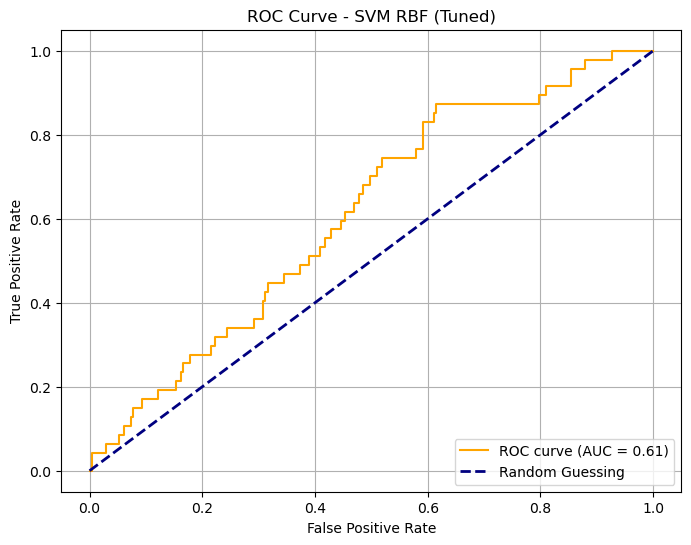

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {auc_svm_rbfbest:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM RBF (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - SVM (kernel = rbf)
* Accuracy = 80%
* Precision for class 1 - 21%, i.e., out of all predicted 1's, only 21% were correct.
* Recall for class 1 - 9%, i.e., out of all actual attrition cases, only 9% were identified.
* F1 score - 0.12 shows the very poor balance between precision and recall.
* AUC score = 0.61, i.e., marginally better than random.

### 6. Decision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(class_weight = 'balanced', 
                            max_depth = 14)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=14)

In [51]:
y_pred_dt = DT.predict(X_test)
y_pred_dt[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [52]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)

print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt )
print("Recall: ", recall_dt)
print("F1 Score: ", f1_dt)
print("Confusion Matrix: \n", confusion_mat_dt)
print("Classification Report: \n", classification_report(y_test, y_pred_dt))


from sklearn.metrics import roc_auc_score

auc_score_dt = roc_auc_score(y_test, DT.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_dt)

Accuracy:  0.7074829931972789
Precision:  0.1320754716981132
Recall:  0.14893617021276595
F1 Score:  0.14
Confusion Matrix: 
 [[201  46]
 [ 40   7]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       247
           1       0.13      0.15      0.14        47

    accuracy                           0.71       294
   macro avg       0.48      0.48      0.48       294
weighted avg       0.72      0.71      0.71       294

AUC Score: 0.4816521664226032


#### Hyperparameter Tuning - Decision Trees

In [53]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [54]:
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best CV Score: 0.6577487404097075
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       247
           1       0.19      0.34      0.25        47

    accuracy                           0.67       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.75      0.67      0.70       294

AUC Score: 0.4876819708846585


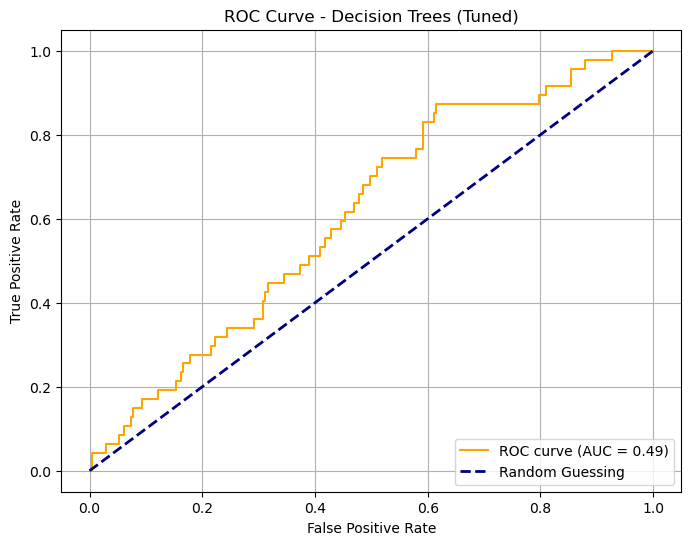

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Trees (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* Thus, the decision tree classifier model is barely better than random guessing.

### 7. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42,class_weight ='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [58]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf )
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)
print("Confusion Matrix: \n", confusion_mat_rf)
print("Classification Report: \n", classification_report(y_test, y_pred_rf))

auc_score_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_rf)

Accuracy:  0.8333333333333334
Precision:  0.4
Recall:  0.0851063829787234
F1 Score:  0.14035087719298245
Confusion Matrix: 
 [[241   6]
 [ 43   4]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294

AUC Score: 0.6520802825394092


#### Hyperparameter Tuning for Random Forest

In [59]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # You can switch to 'recall' if you're optimizing for that
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [60]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
print("Best Parameters: ", best_params)
print("Accuracy of the tuned model: ", accuracy_best_rf)
print("Recall of the tuned model: ", recall_best_rf)
print("Cross validation score: ", grid_search_rf.best_score_)

y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy of the tuned model:  0.826530612244898
Recall of the tuned model:  0.14893617021276595
Cross validation score:  0.7528335721629871
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       247
           1       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294

AUC Score: 0.6776638814712723


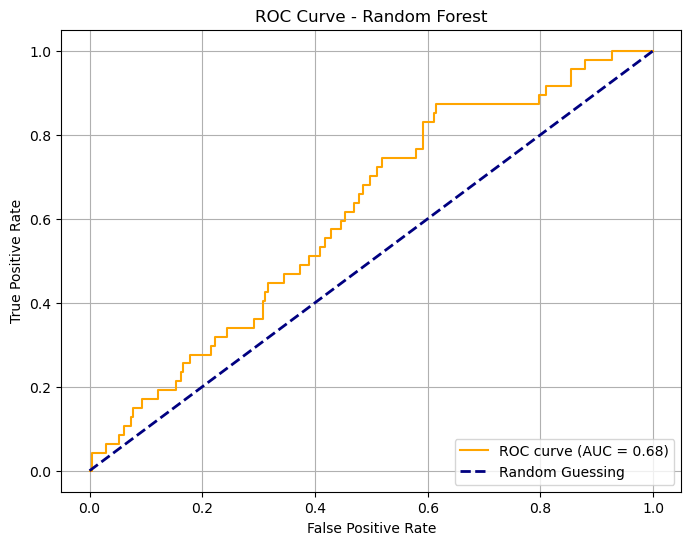

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Random Forest
* Accuracy = 82.65%
* Recall for class 1 = almost 15% of positive cases were correctly identified
* Precision for class 1 = Around 39% of predicted positives were correct
* F1 Score for class 1 = 0.22 = indicates weak performance on minority class
* AUC Score = 0.678 = Better than a random one, shows moderate separation between classes
* Cross validation score = 0.752 = Model is fairly consistent across folds.

#### Checking Feature Importance

In [62]:
feature_importances = best_model.feature_importances_
features = X_train.columns  # if you're using a DataFrame
sorted_idx = feature_importances.argsort()
sorted_idx

array([14, 15, 12, 11, 16, 13,  9, 10, 17,  7,  2,  4,  3,  6,  1,  8,  0,
        5], dtype=int64)

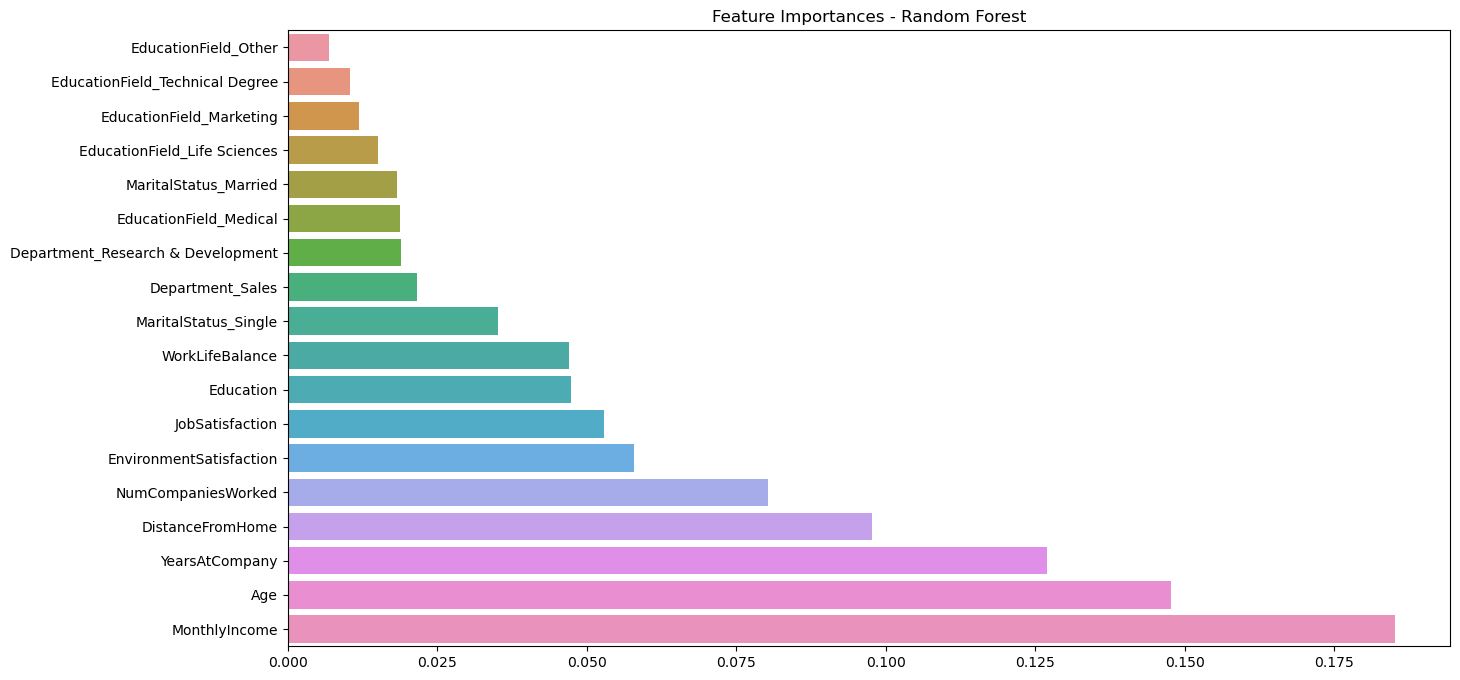

In [63]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importances - Random Forest")
plt.show()

* Monthly Income, Age, and Years at Company seems to be important factors for Attrition

### 8. Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
base_estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
bc = BaggingClassifier(estimator = base_estimator, n_estimators = 100, random_state = 42)
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  n_estimators=100, random_state=42)

In [65]:
y_pred_bc = bc.predict(X_test)
y_pred_bc[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [66]:
accuracy_bc = accuracy_score(y_test, y_pred_bc)
precision_bc = precision_score(y_test, y_pred_bc)
recall_bc = recall_score(y_test, y_pred_bc)
f1_bc = f1_score(y_test, y_pred_bc)
confusion_mat_bc = confusion_matrix(y_test, y_pred_bc)

print("Accuracy: ", accuracy_bc)
print("Precision: ", precision_bc )
print("Recall: ", recall_bc)
print("F1 Score: ", f1_bc)
print("Confusion Matrix: \n", confusion_mat_bc)
print("Classification Report: \n", classification_report(y_test, y_pred_bc))

auc_score_bc = roc_auc_score(y_test, bc.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_bc)

Accuracy:  0.8163265306122449
Precision:  0.23076923076923078
Recall:  0.06382978723404255
F1 Score:  0.1
Confusion Matrix: 
 [[237  10]
 [ 44   3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       247
           1       0.23      0.06      0.10        47

    accuracy                           0.82       294
   macro avg       0.54      0.51      0.50       294
weighted avg       0.75      0.82      0.77       294

AUC Score: 0.6361874407787061


#### Model Evaluation
* Accuracy seems to be 81.63%
* Precision for class 1 = 23% of predicted positives were actually correct
* Recall for class 1 = 6% = model is missing most of the actual positives
* F1 Score for class 1 = low due to the low recall value
* AUC Score of 0.64 = modest class separability shown.
* Model seems to be biased toward the majority class

#### Hyperparameter Tuning for Bagging Classifier

In [67]:
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    scoring='roc_auc',  # you can also use 'f1' or 'recall' depending on your goal
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\aiswa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [None, 5, 10],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [68]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best_bc = best_model.predict(X_test)
accuracy_best_bc = accuracy_score(y_test, y_pred_best_bc)
recall_best_bc = recall_score(y_test, y_pred_best_bc)
print("Best Parameters: ", best_params)
print("Accuracy of the tuned model: ", accuracy_best_bc)
print("Recall of the tuned model: ", recall_best_bc)
print("Cross validation score: ", grid_search.best_score_)

y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_best_bc))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Accuracy of the tuned model:  0.8197278911564626
Recall of the tuned model:  0.14893617021276595
Cross validation score:  0.7514507214814454
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.35      0.15      0.21        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.55       294
weighted avg       0.77      0.82      0.79       294

AUC Score: 0.6893789301404083


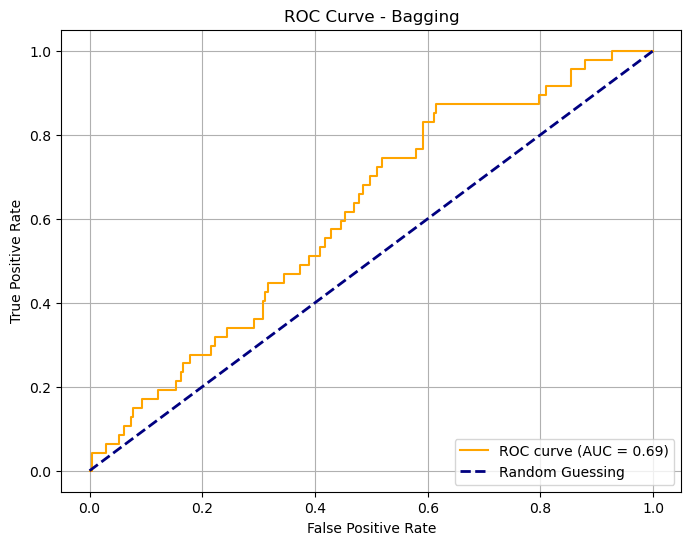

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Bagging
* Accuracy = 81.97%
* Recall for class 1 = 14.89% = low, but better than earlier models
* Precision for Class 1 = 35% = reasonable for imbalanced data
* AUC Score = 0.689 = Improvement seen at distinguishing the classes

###  9. Pasting (Boostrap = False)

In [70]:
pc = BaggingClassifier(estimator = base_estimator, max_features = 1.0, 
                       max_samples = 0.5, n_estimators = 50, random_state = 42,
                      bootstrap = False)
pc.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  max_samples=0.5, n_estimators=50, random_state=42)

In [71]:
y_pred_pc = pc.predict(X_test)
y_pred_pc[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [72]:
accuracy_pc = accuracy_score(y_test, y_pred_pc)
precision_pc = precision_score(y_test, y_pred_pc)
recall_pc = recall_score(y_test, y_pred_pc)
f1_pc = f1_score(y_test, y_pred_pc)
confusion_mat_pc = confusion_matrix(y_test, y_pred_pc)

print("Accuracy: ", accuracy_pc)
print("Precision: ", precision_pc )
print("Recall: ", recall_pc)
print("F1 Score: ", f1_pc)
print("Confusion Matrix: \n", confusion_mat_pc)
print("Classification Report: \n", classification_report(y_test, y_pred_pc))

auc_score_pc = roc_auc_score(y_test, pc.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_pc)

Accuracy:  0.826530612244898
Precision:  0.35714285714285715
Recall:  0.10638297872340426
F1 Score:  0.16393442622950818
Confusion Matrix: 
 [[238   9]
 [ 42   5]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.36      0.11      0.16        47

    accuracy                           0.83       294
   macro avg       0.60      0.53      0.53       294
weighted avg       0.77      0.83      0.79       294

AUC Score: 0.5994917736239125


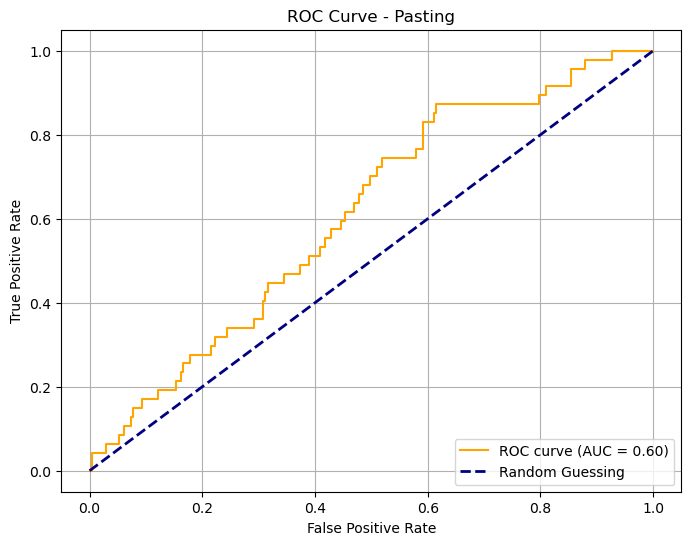

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {auc_score_pc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Pasting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Pasting
* Accuracy = 82.65%
* Precision for Class 1 = 35.71% = better than random
* Recall for Class 1 = 10.64% = model is cautious about predicting Class 1
* F1 Score for Class 1 = Balanced, but low
* AUC Score = 0.599 = Not ideal

### 10. AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth = 1, class_weight = 'balanced')
ada = AdaBoostClassifier(random_state = 42, estimator = base_model, 
                        n_estimators = 500)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   n_estimators=500, random_state=42)

In [75]:
y_pred_ada = ada.predict(X_test)
y_pred_ada[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [76]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
confusion_mat_ada = confusion_matrix(y_test, y_pred_ada)

print("Accuracy: ", accuracy_ada)
print("Precision: ", precision_ada )
print("Recall: ", recall_ada)
print("F1 Score: ", f1_ada)
print("Confusion Matrix: \n", confusion_mat_ada)
print("Classification Report: \n", classification_report(y_test, y_pred_ada))

auc_score_ada = roc_auc_score(y_test, pc.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_ada)

Accuracy:  0.6802721088435374
Precision:  0.23595505617977527
Recall:  0.44680851063829785
F1 Score:  0.30882352941176466
Confusion Matrix: 
 [[179  68]
 [ 26  21]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       247
           1       0.24      0.45      0.31        47

    accuracy                           0.68       294
   macro avg       0.55      0.59      0.55       294
weighted avg       0.77      0.68      0.71       294

AUC Score: 0.5994917736239125


* Accuracy = 68.0%
* Precision for Class 1 = 23.6% = Trade-off for improved recall
* Recall for Class 1 = 44.7% = Better
* F1 Score for Class 1 = 0.31 = More Balanced 
* AUC Score = 0.60 = Acceptable

#### Hyperparameter Tuning for AdaBoost

In [77]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5, 10]
}
base_model = DecisionTreeClassifier(class_weight='balanced', max_depth = 1)
ada = AdaBoostClassifier(estimator=base_model, random_state=42)
grid = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='roc_auc')

In [78]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best_ada = best_model.predict(X_test)
accuracy_best_ada = accuracy_score(y_test, y_pred_best_ada)
recall_best_ada = recall_score(y_test, y_pred_best_ada)
print("Best Parameters: ", best_params)
print("Accuracy of the tuned model: ", accuracy_best_ada)
print("Recall of the tuned model: ", recall_best_ada)
print("Cross validation score: ", grid_search.best_score_)

y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_best_ada))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Accuracy of the tuned model:  0.8197278911564626
Recall of the tuned model:  0.14893617021276595
Cross validation score:  0.7514507214814454
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.35      0.15      0.21        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.55       294
weighted avg       0.77      0.82      0.79       294

AUC Score: 0.6893789301404083


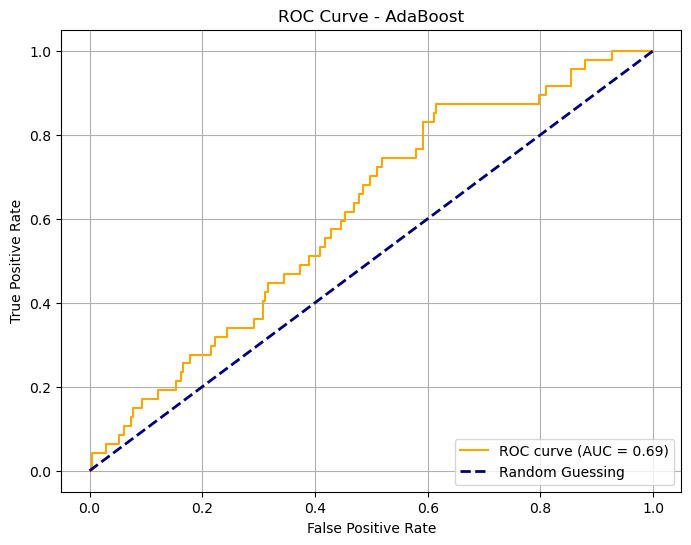

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - AdaBoost
* Accuracy = 81.97% 
* Precision for class 1 = 35% = Out of all predicted positives, 35% were actually positive. Acceptable for minortiy class
* Recall for class 1 = 14.89% = Slightly better than earlier models. Still low - model is missing many actual positives.
* F1-Score for class 1 = 21% = Balance between precision and recall; not ideal, but better than random guessing.
* AUC Score of 0.689 = Reflects the model's ability to rank positive instances higher than negatives.

### 11. GradientBoosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01, 
                               max_depth = 3, random_state = 42)
gbr.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [81]:
y_pred_gbr = gbr.predict(X_test)
y_pred_gbr[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [82]:
accuracy_gbr = accuracy_score(y_test, y_pred_gbr)
precision_gbr = precision_score(y_test, y_pred_gbr)
recall_gbr = recall_score(y_test, y_pred_gbr)
f1_gbr = f1_score(y_test, y_pred_gbr)
confusion_mat_gbr = confusion_matrix(y_test, y_pred_gbr)

print("Accuracy: ", accuracy_gbr)
print("Precision: ", precision_gbr )
print("Recall: ", recall_gbr)
print("F1 Score: ", f1_gbr)
print("Confusion Matrix: \n", confusion_mat_gbr)
print("Classification Report: \n", classification_report(y_test, y_pred_gbr))

auc_score_gbr = roc_auc_score(y_test, pc.predict_proba(X_test)[:, 1])

print("AUC Score:", auc_score_gbr)

Accuracy:  0.8401360544217688
Precision:  0.5
Recall:  0.06382978723404255
F1 Score:  0.11320754716981131
Confusion Matrix: 
 [[244   3]
 [ 44   3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294

AUC Score: 0.5994917736239125


#### Hyperparameter Tuning

In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [84]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best_gbr = best_model.predict(X_test)
accuracy_best_gbr = accuracy_score(y_test, y_pred_best_gbr)
recall_best_gbr = recall_score(y_test, y_pred_best_gbr)
print("Best Parameters: ", best_params)
print("Accuracy of the tuned model: ", accuracy_best_gbr)
print("Recall of the tuned model: ", recall_best_gbr)
print("Cross validation score: ", grid_search.best_score_)

y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_best_gbr))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy of the tuned model:  0.826530612244898
Recall of the tuned model:  0.10638297872340426
Cross validation score:  0.7500456070186233
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.36      0.11      0.16        47

    accuracy                           0.83       294
   macro avg       0.60      0.53      0.53       294
weighted avg       0.77      0.83      0.79       294

AUC Score: 0.7140149883710915


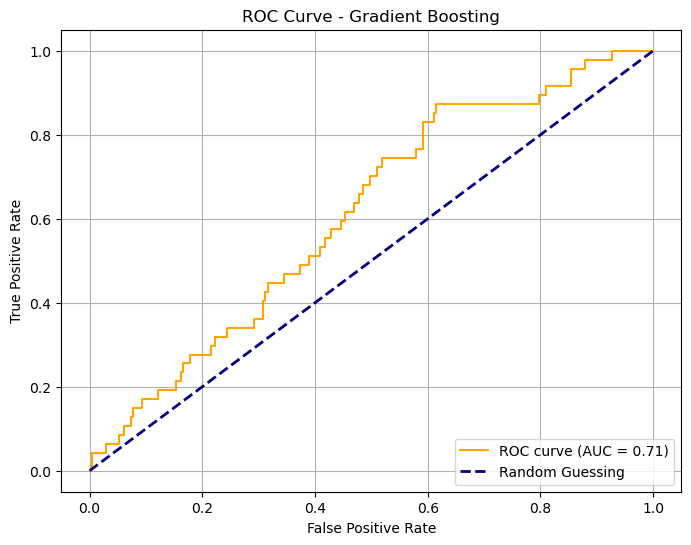

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Gradient Boosting
* Accuracy = 82.7%
* Precision for Class 1 = 36% = Out of all instances predicted as class 1, only 36% were actually class 1. This is moderate.
* Recall for class 1 = 10.6% = Out of all actual class 1 instances, only around 11% were correctly identified. This is low, suggesting the model misses many true positives.
* F1 Score for class 1 = 16% = The harmonic mean of precision and recall.
* AUC Score = 0.714 = AUC above 0.7 is decent and is reasonably spearating the classes.
* Cross Validation Score = 75% = Generalizes fairly well across different subsets of training data.
* No class balancing was applied, but the tuned model still performs better than the base models with balancing attempts.

### 12. Voting Classifier - Hard Voting

In [86]:
from sklearn.ensemble import VotingClassifier

In [87]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8, random_state=42)

In [88]:
hard_voting = VotingClassifier(estimators=[
    ('dt', dt),
    ('rf', rf),
    ('gb', gb)
], voting='hard')
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         random_state=42,
                                                         subsample=0.8))])

In [89]:
y_pred = hard_voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Precision: 0.42857142857142855
Recall: 0.1276595744680851
F1 Score: 0.1967213114754098
Confusion Matrix:
 [[239   8]
 [ 41   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.43      0.13      0.20        47

    accuracy                           0.83       294
   macro avg       0.64      0.55      0.55       294
weighted avg       0.79      0.83      0.79       294



### 13. Voting Classifier - Soft Voting

In [90]:
soft_voting = VotingClassifier(estimators=[
    ('dt', dt),
    ('rf', rf),
    ('gb', gb)
], voting='soft')

soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         random_state=42,
                                                         subsample=0.8))],
                 voting='soft')

In [91]:
y_pred = soft_voting.predict(X_test)
y_proba = soft_voting.predict_proba(X_test)[:,1]  # For AUC

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8231292517006803
Precision: 0.35294117647058826
Recall: 0.1276595744680851
F1 Score: 0.18749999999999997
Confusion Matrix:
 [[236  11]
 [ 41   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.35      0.13      0.19        47

    accuracy                           0.82       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.77      0.82      0.79       294

AUC Score: 0.5843741924369024


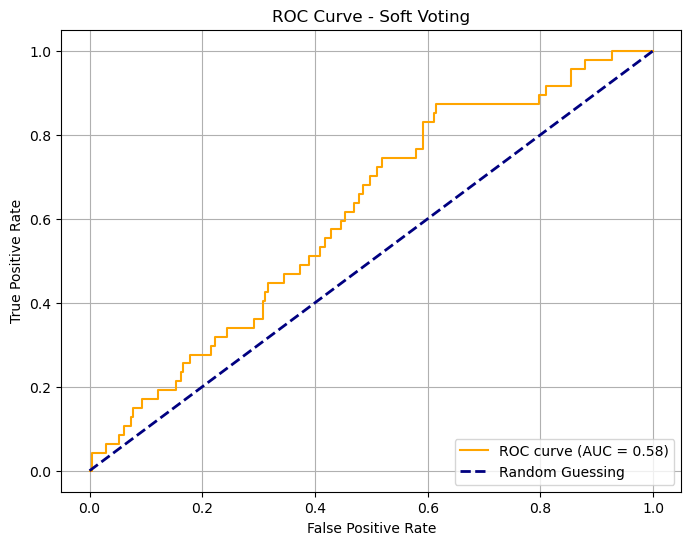

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Soft Voting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Voting Classifier
* Accuracy - similar values
* Recall - low in both cases, which could be a result of the class imbalances
* Precision - Hard Voting has higher precision than Soft Voting for class 1, i.e., when Hard Voting predicts class 1, its more likely to be correct.
* F1 Score - low in both cases, but Hard Voting performs slightly better
* AUC Score for Soft Voting = 0.584 = shows poor discrimination between classes.
* Hard Voting is thus better when we care more about overall accuracy or precision.
* Soft Voting is better when we need probability estimates or need to find AUC

### 15.  Stacking

In [93]:
from sklearn.ensemble import StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
]
meta_learner = LogisticRegression(class_weight='balanced', random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      random_state=42))

In [94]:
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)[:, 1] 
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       247
           1       0.26      0.40      0.32        47

    accuracy                           0.72       294
   macro avg       0.57      0.59      0.57       294
weighted avg       0.78      0.72      0.75       294

AUC Score: 0.6703419760530623


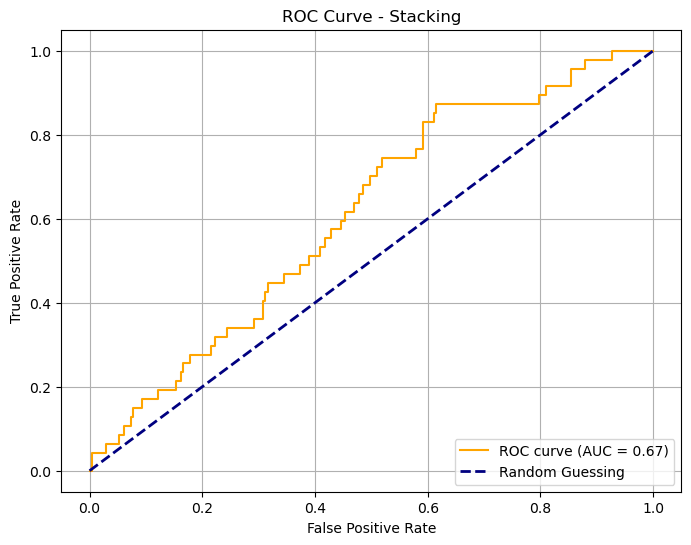

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacking")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Model Evaluation - Stacking
* Accuracy = 72% = lower than individual classifiers like Random Forest or Gradient Boosting
* Precision for class 1 = Out of all predicted 1s, only 26% were correct.
* Recall for class 1 = Catches most of 0 samples because value is 0.79
* F1 Score of 0.83 = Solid balance of precision and recall
* AUC Score of 0.67 = Moderate model ability to separate the two classes.

* A variety of classification algorithms on the IBM HR Attrition dataset has been explored to predict whether an employee is likely to leave the company. 
* After preprocessing the data and dealing with class imbalance, all models from logistic regression and decision trees to ensemble methods like Random Forest, AdaBoost, Gradient Boosting, and even stacked and voting classifiers were tried.
* While most models performed well on the majority class, catching the minority class (actual attrition) proved to be trickier — which is expected with real-world, imbalanced data. By tuning hyperparameters and trying techniques like soft voting and stacking, recall and overall AUC was improved. Out of all the discussed models, Gradient Boosting turned out to be the best, where AUC Score is around 0.714.